In [2]:
import sqlite3
import pandas as pd

# Path to your DB
db_path = "processing.db"

# Create connection
conn = sqlite3.connect(db_path)

# Check tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,beam_runs
1,sqlite_sequence
2,detections


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_det = pd.read_sql("SELECT * FROM detections;", conn)

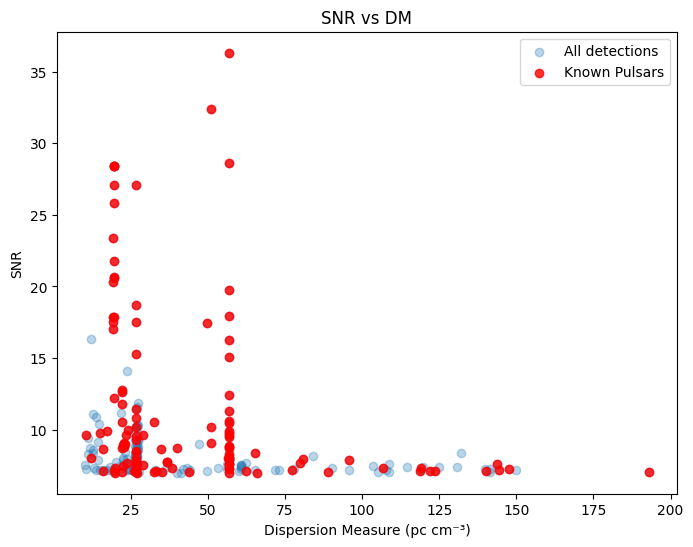

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df_det['candidate_dm'], df_det['snr'], alpha=0.3, label="All detections")

# Overlay pulsars (non-null pulsar_name)
pulsars = df_det[df_det['pulsar_name'].notna()]
plt.scatter(pulsars['candidate_dm'], pulsars['snr'], color='red', alpha=0.8, label="Known Pulsars")

plt.xlabel("Dispersion Measure (pc cm⁻³)")
plt.ylabel("SNR")
plt.title("SNR vs DM")
plt.legend()
plt.show()

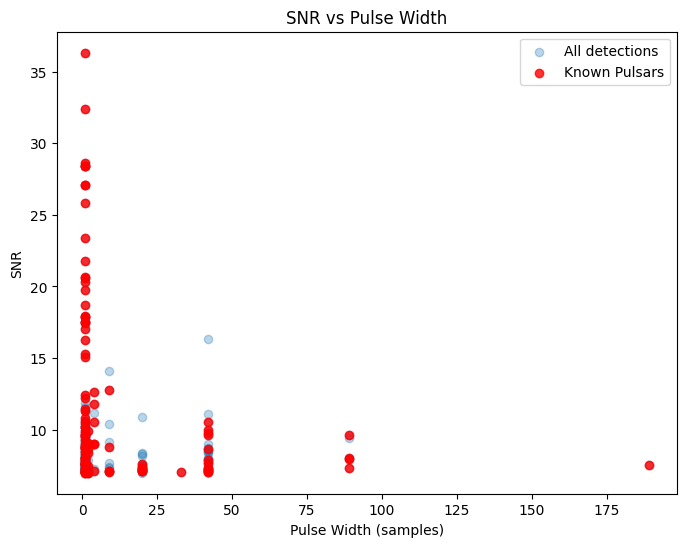

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df_det['width_samples'], df_det['snr'], alpha=0.3, label="All detections")

pulsars = df_det[df_det['pulsar_name'].notna()]
plt.scatter(pulsars['width_samples'], pulsars['snr'], color='red', alpha=0.8, label="Known Pulsars")

plt.xlabel("Pulse Width (samples)")
plt.ylabel("SNR")
plt.title("SNR vs Pulse Width")
plt.legend()
plt.show()

In [9]:
stats = df_det.groupby(pd.cut(df_det['candidate_dm'], bins=10))['snr'].describe()
stats

/tmp/ipykernel_649634/2370193422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_det.groupby(pd.cut(df_det['candidate_dm'], bins=10))['snr'].describe()


,count,mean,std,min,25%,50%,75%,max
candidate_dm,,,,,,,,
"(10.017, 28.47]",133.0,10.501376,5.045463,7.001,7.56200,8.5930,10.39300,28.397
"(28.47, 46.74]",20.0,7.678500,0.967719,7.006,7.05825,7.2780,7.73050,10.543
"(46.74, 65.01]",46.0,10.942804,6.569251,7.014,7.52250,8.2090,10.42075,36.315
"(65.01, 83.28]",9.0,7.446222,0.444328,7.016,7.20200,7.2220,7.67900,8.355
"(83.28, 101.55]",5.0,7.527800,0.459933,7.062,7.21900,7.3380,7.88200,8.138
"(101.55, 119.82]",10.0,7.307300,0.196269,7.019,7.15600,7.3470,7.41225,7.640
"(119.82, 138.09]",5.0,7.465200,0.515189,7.103,7.12600,7.3660,7.37300,8.358
"(138.09, 156.36]",8.0,7.253875,0.171716,7.047,7.16850,7.2365,7.27675,7.630
"(156.36, 174.63]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
